downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


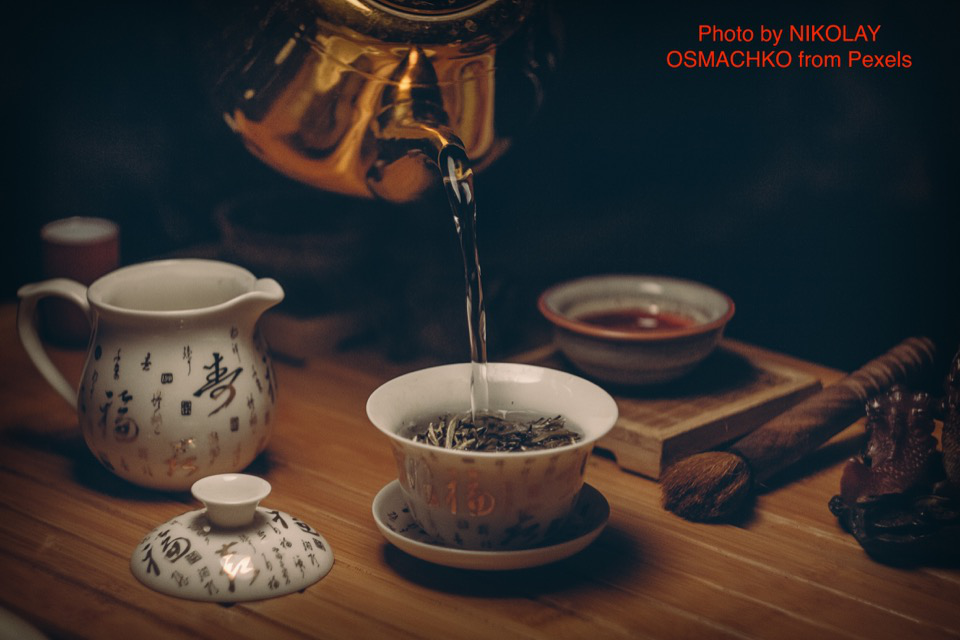

In [0]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

[[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]
Ellipse 
[[-2.18569767e-08]]
[[-2.45345291e-08]]
[[-2.19079084e-08]]
[[-2.42143869e-08]]
[[-2.49710865e-08]]
u =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
m1v.T =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
v =  [[-3.17619447e-04 -2.09090136e-03  9.99997764e-01]
 [ 6.51716385e-01 -7.58461504e-01 -1.37887347e-03]
 [-7.58462690e-01 -6.51714489e-01 -1.60357680e-03]]
usv =  [[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]


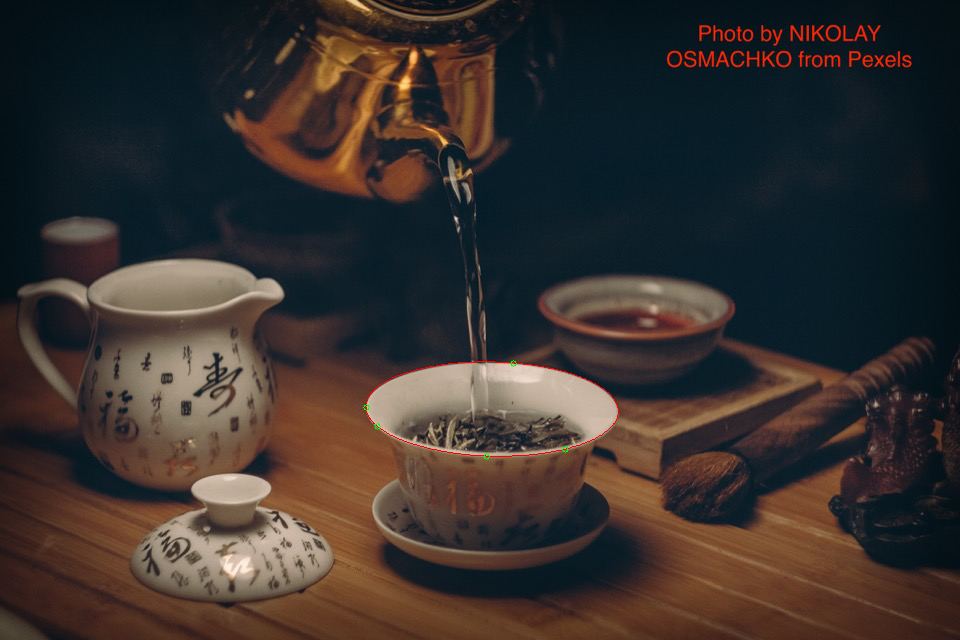

In [0]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

u =  [[-3.17524241e-04  6.51922079e-01  7.58285897e-01]
 [-2.09152849e-03 -7.58284710e-01  6.51920183e-01]
 [ 9.99997762e-01 -1.37897609e-03  1.60428738e-03]]
m1v.T =  [[-3.17524241e-04  6.51922079e-01  7.58285897e-01]
 [-2.09152849e-03 -7.58284710e-01  6.51920183e-01]
 [ 9.99997762e-01 -1.37897609e-03  1.60428738e-03]]
v =  [[-3.17524241e-04 -2.09152849e-03  9.99997762e-01]
 [ 6.51922079e-01 -7.58284710e-01 -1.37897609e-03]
 [-7.58285897e-01 -6.51920183e-01 -1.60428738e-03]]
usv =  [[ 1.00000000e+00 -1.52267567e-01 -4.29508474e+02]
 [-1.52267567e-01  7.09966317e+00 -2.82915252e+03]
 [-4.29508474e+02 -2.82915252e+03  1.35267024e+06]]


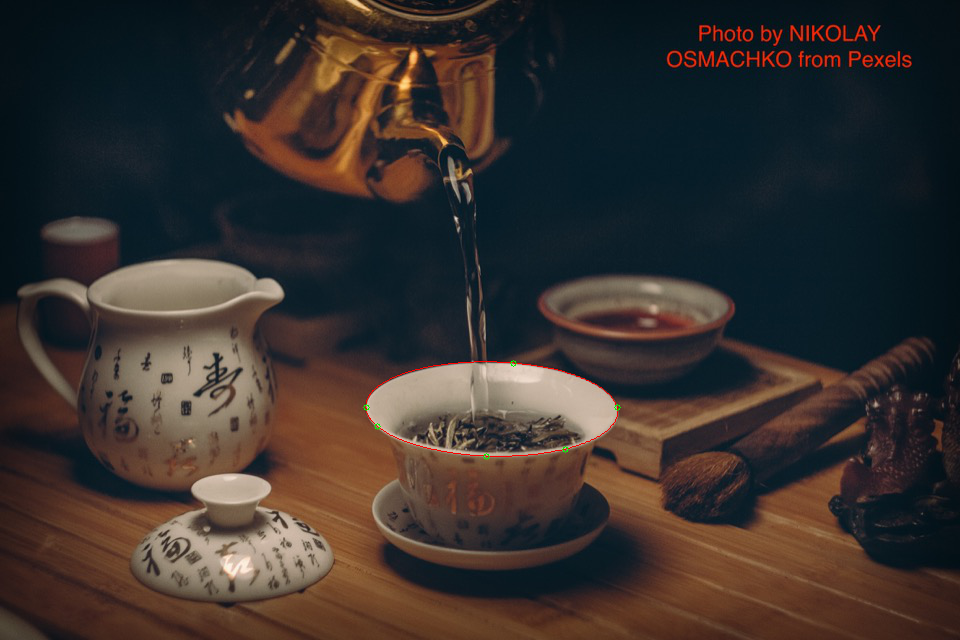

In [0]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [617, 407]], np.double)

m = np.zeros((6,6))

for k in range(0, len(points)):
  m[k][0] = points[k][0]**2
  m[k][1] = 2*points[k][0]*points[k][1]
  m[k][2] = points[k][1]**2
  m[k][3] = 2*points[k][0]
  m[k][4] = 2*points[k][1]
  m[k][5] = 1
  
mu, ms, mv = np.linalg.svd(m)
R = mv[5, :]
R /= R[0]

# R[0]=A R[1]=H R[2]=B R[3]=G R[4]=F R[5]=C
E = np.array([
      [R[0], R[1], R[3]],
      [R[1], R[2], R[4]],
      [R[3], R[4], R[5]]
], np.double )

u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )


# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)